**Q1**

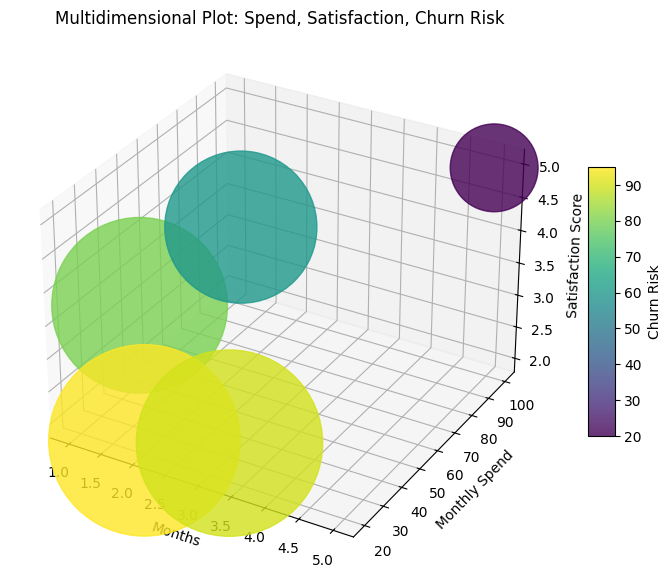

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Example data
months = np.array([1, 2, 3, 5,2])
monthly_spend = np.array([50, 70, 30, 100,20])
satisfaction_score = np.array([3, 4, 2, 5,2])
churn_risk =np.array([80, 60, 90, 20,95])

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(months, monthly_spend, satisfaction_score, c=churn_risk, cmap='viridis', s=churn_risk*200, alpha=0.8)

# Add color bar for churn risk
cbar = plt.colorbar(sc, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Churn Risk')

# Labels and title
ax.set_xlabel('Months')
ax.set_ylabel('Monthly Spend')
ax.set_zlabel('Satisfaction Score')
ax.set_title('Multidimensional Plot: Spend, Satisfaction, Churn Risk')

plt.show()


**Q2**

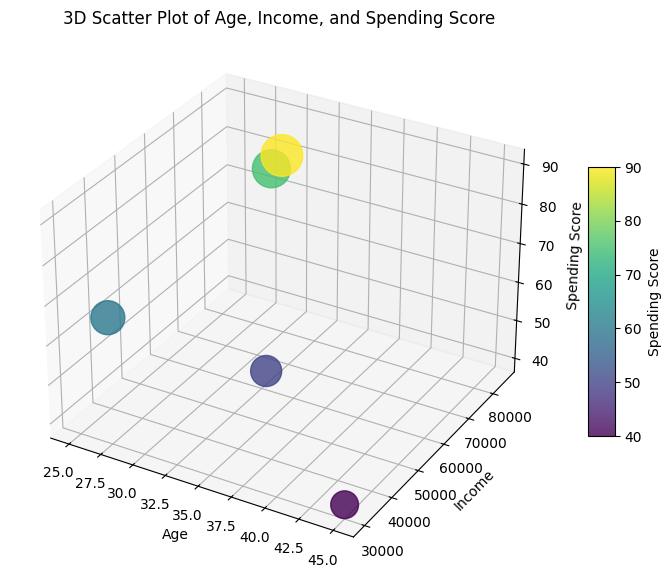

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

# Sample data (replace with your actual data)
data = {'age': [25, 32, 45, 28, 35],
        'income': [40000, 70000, 30000, 85000, 50000],
        'spending_score': [60, 90, 40, 75, 50]}
df = pd.DataFrame(data)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(df['age'], df['income'], df['spending_score'], c=df['spending_score'], cmap='viridis', s=df['spending_score']*10, alpha=0.8)


# Add color bar
cbar = plt.colorbar(sc, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Spending Score')

# Labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Spending Score')
ax.set_title('3D Scatter Plot of Age, Income, and Spending Score')

plt.show()

**Q3**

In [3]:
import itertools

# Advertising channel data
channels = {
    "Social Media": {"cost": 200, "sales": 1125},  # Rs. 800 -> Rs. 4500
    "Local Radio": {"cost": 200, "sales": 1166.67},  # Rs. 600 -> Rs. 3500
    "Flyer Distribution": {"cost": 50, "sales": 208.33},  # Rs. 600 -> Rs. 2500
}

# Total budget
budget = 2000

# Generate all possible combinations of allocations
allocations = []
for sm_blocks in range(0, budget // channels["Social Media"]["cost"] + 1):
    for lr_blocks in range(0, budget // channels["Local Radio"]["cost"] + 1):
        for fd_blocks in range(0, budget // channels["Flyer Distribution"]["cost"] + 1):
            total_cost = (
                sm_blocks * channels["Social Media"]["cost"] +
                lr_blocks * channels["Local Radio"]["cost"] +
                fd_blocks * channels["Flyer Distribution"]["cost"]
            )
            if total_cost == budget:  # Ensure all budget is used
                total_sales = (
                    sm_blocks * channels["Social Media"]["sales"] +
                    lr_blocks * channels["Local Radio"]["sales"] +
                    fd_blocks * channels["Flyer Distribution"]["sales"]
                )
                allocations.append({
                    "Social Media": sm_blocks * channels["Social Media"]["cost"],
                    "Local Radio": lr_blocks * channels["Local Radio"]["cost"],
                    "Flyer Distribution": fd_blocks * channels["Flyer Distribution"]["cost"],
                    "Total Cost": total_cost,
                    "Total Sales": total_sales,
                })

# Find the allocation with the maximum sales
optimal_allocation = max(allocations, key=lambda x: x["Total Sales"])

# Print the optimal allocation
print("Optimal Allocation:")
print(f"Social Media Advertising: Rs. {optimal_allocation['Social Media']}")
print(f"Local Radio Advertising: Rs. {optimal_allocation['Local Radio']}")
print(f"Flyer Distribution: Rs. {optimal_allocation['Flyer Distribution']}")
print(f"Total Cost: Rs. {optimal_allocation['Total Cost']}")
print(f"Total Sales: Rs. {optimal_allocation['Total Sales']}")


Optimal Allocation:
Social Media Advertising: Rs. 0
Local Radio Advertising: Rs. 2000
Flyer Distribution: Rs. 0
Total Cost: Rs. 2000
Total Sales: Rs. 11666.7


In [4]:
from scipy.optimize import linprog

# Advertising channel data
costs = [200, 200, 50]  # Costs per block for Social Media, Local Radio, and Flyer Distribution
sales = [1125, 1166.67, 208.33]  # Sales per block for Social Media, Local Radio, and Flyer Distribution
budget = 2000

# Bounds for each variable (number of blocks for each channel)
bounds = [(0, budget // costs[0]),  # Social Media
          (0, budget // costs[1]),  # Local Radio
          (0, budget // costs[2])]  # Flyer Distribution

# Linear programming setup
# Objective: Maximize sales (negative because linprog minimizes)
c = [-sales[0], -sales[1], -sales[2]]

# Constraint: Total cost must equal the budget
A_eq = [[costs[0], costs[1], costs[2]]]
b_eq = [budget]

# Solve the linear programming problem
result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

# Extract the results
if result.success:
    blocks = result.x
    optimal_allocation = {
        "Social Media": blocks[0] * costs[0],
        "Local Radio": blocks[1] * costs[1],
        "Flyer Distribution": blocks[2] * costs[2],
        "Total Cost": sum(blocks[i] * costs[i] for i in range(3)),
        "Total Sales": -result.fun,
    }

    # Print the optimal allocation
    print("Optimal Allocation:")
    print(f"Social Media Advertising: Rs. {optimal_allocation['Social Media']}")
    print(f"Local Radio Advertising: Rs. {optimal_allocation['Local Radio']}")
    print(f"Flyer Distribution: Rs. {optimal_allocation['Flyer Distribution']}")
    print(f"Total Cost: Rs. {optimal_allocation['Total Cost']}")
    print(f"Total Sales: Rs. {optimal_allocation['Total Sales']}")
else:
    print("No optimal solution found.")


Optimal Allocation:
Social Media Advertising: Rs. 0.0
Local Radio Advertising: Rs. 2000.0
Flyer Distribution: Rs. 0.0
Total Cost: Rs. 2000.0
Total Sales: Rs. 11666.7


**Q4**

Linear Regression for Gross_Additions:
Slope: -46.99999999999999
Intercept: 1005.0
R-squared: 0.9796008869179601



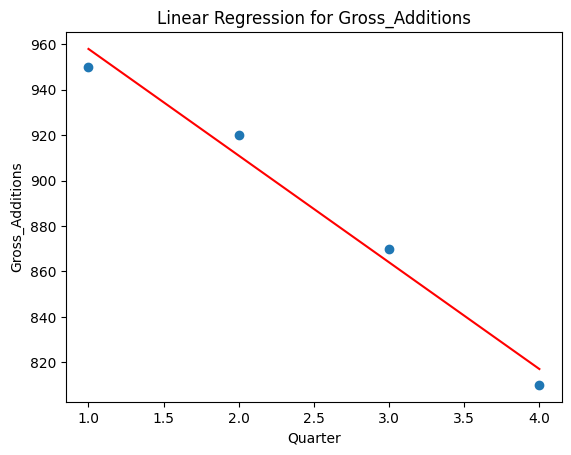

Linear Regression for Churn:
Slope: 1.025
Intercept: 1.25
R-squared: 0.9688760806916427



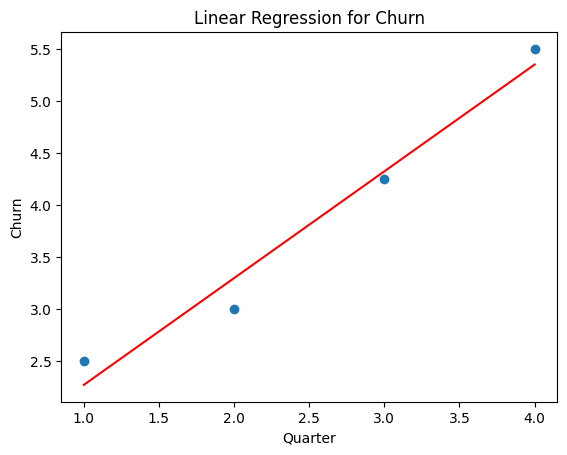

Linear Regression for GAC_Payout:
Slope: 5.999999999999998
Intercept: 73.0
R-squared: 0.72



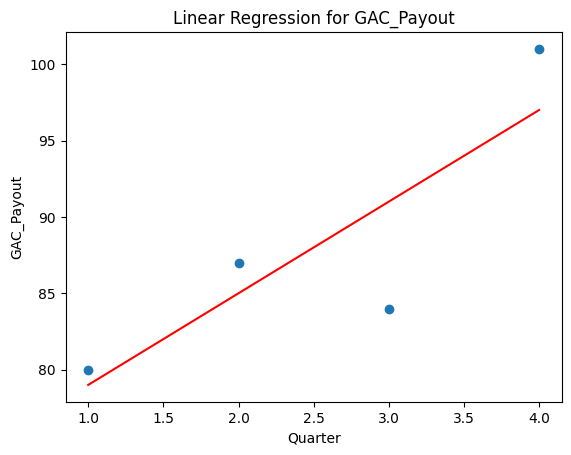

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data (replace with your actual data)
data = {'Quarter': ['Q1', 'Q2', 'Q3', 'Q4'],
        'Gross_Additions': [950, 920, 870, 810],
        'Churn': [2.50, 3.00, 4.25, 5.50],
        'GAC_Payout': [80, 87, 84, 101]}

df = pd.DataFrame(data)

# Convert 'Quarter' to numerical representation
df['Quarter_Num'] = df['Quarter'].map({'Q1': 1, 'Q2': 2, 'Q3': 3, 'Q4': 4})

# Perform linear regression for each dependent variable
for col in ['Gross_Additions', 'Churn', 'GAC_Payout']:
    X = df[['Quarter_Num']]
    y = df[col]

    model = LinearRegression()
    model.fit(X, y)

    # Make predictions
    y_pred = model.predict(X)

    # Calculate R-squared
    r_squared = model.score(X, y)

    # Print results
    print(f"Linear Regression for {col}:")
    print(f"Slope: {model.coef_[0]}")
    print(f"Intercept: {model.intercept_}")
    print(f"R-squared: {r_squared}")
    print()

    # Plot the data and regression line
    plt.scatter(X, y)
    plt.plot(X, y_pred, color='red')
    plt.xlabel('Quarter')
    plt.ylabel(col)
    plt.title(f'Linear Regression for {col}')
    plt.show()

In [6]:
# Sample data (replace with your actual data)
data = {
        'Gross_Additions': [950, 920, 870, 810],
        'Churn': [2.50, 3.00, 4.25, 5.50],
        'GAC_Payout': [80, 87, 84, 101]}

df = pd.DataFrame(data)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
correlation_matrix

,Gross_Additions,Churn,GAC_Payout
Gross_Additions,1.000000,-0.998491,-0.875566
Churn,-0.998491,1.000000,0.855590
GAC_Payout,-0.875566,0.855590,1.000000
